In [1]:
import pandas as pd
import numpy as np
from astropy.cosmology import Planck15 as cosmo
import matplotlib.pyplot as plt
import astropy.units as u
import GCRCatalogs

In [2]:
merged_cat = pd.read_csv("/global/cscratch1/sd/mlokken/sn_hostenv/DC2full_pzRedshifts_twentyHealpix_sdss_updMag_Rkpc_Final.tar.gz")

In [3]:
merged_cat.columns

Index(['galaxy_id', 'DC2redshift', 'PZflowredshift', 'Mag_true_g_sdss_z0',
       'Mag_true_r_sdss_z0', 'Mag_true_i_sdss_z0', 'Mag_true_z_sdss_z0',
       'R_kpc'],
      dtype='object')

In [4]:
img_moments = pd.read_csv("/global/cscratch1/sd/mlokken/sn_hostenv/FullImageMomentsCatalog.tar.gz")

In [5]:
img_moments.columns

Index(['Unnamed: 0', 'Iyy_pixel', 'IxxPSF_pixel', 'IxyPSF_pixel', 'objectId',
       'IyyPSF_pixel', 'Ixy_pixel', 'Ixx_pixel', 'cosmoDC2_ID',
       'RSQ_pixel_gal'],
      dtype='object')

In [6]:
img_moments.rename(columns={'cosmoDC2_ID':'galaxy_id'}, inplace=True)

In [7]:
img_moments.columns

Index(['Unnamed: 0', 'Iyy_pixel', 'IxxPSF_pixel', 'IxyPSF_pixel', 'objectId',
       'IyyPSF_pixel', 'Ixy_pixel', 'Ixx_pixel', 'galaxy_id', 'RSQ_pixel_gal'],
      dtype='object')

In [8]:
cat = pd.merge(img_moments, merged_cat, on='galaxy_id')

In [9]:
del merged_cat

In [10]:
del img_moments

In [11]:
cat.columns

Index(['Unnamed: 0', 'Iyy_pixel', 'IxxPSF_pixel', 'IxyPSF_pixel', 'objectId',
       'IyyPSF_pixel', 'Ixy_pixel', 'Ixx_pixel', 'galaxy_id', 'RSQ_pixel_gal',
       'DC2redshift', 'PZflowredshift', 'Mag_true_g_sdss_z0',
       'Mag_true_r_sdss_z0', 'Mag_true_i_sdss_z0', 'Mag_true_z_sdss_z0',
       'R_kpc'],
      dtype='object')

In [44]:
cat_mag_sample = cat[(cat['Mag_true_r_sdss_z0']<-20)&(cat['Mag_true_r_sdss_z0']>-21)]

In [45]:
len(cat_mag_sample)/len(cat)

0.13419900651553826

In [13]:
cat_sample = cat.sample(10000)

In [92]:
R_kpc = cosmo.kpc_proper_per_arcmin(cat_sample['PZflowredshift'].to_numpy())*((np.sqrt(cat_sample['RSQ_pixel_gal'].to_numpy())*.2*u.arcsec).to(u.arcmin))

/tmp/ipykernel_2381/651581193.py:1: RuntimeWarning: invalid value encountered in sqrt
  R_kpc = cosmo.kpc_proper_per_arcmin(cat_sample['PZflowredshift'].to_numpy())*((np.sqrt(cat_sample['RSQ_pixel_gal'].to_numpy())*.2*u.arcsec).to(u.arcmin))


In [93]:
R_kpc

<Quantity [4.87126356, 2.43136516, 1.06775144, ..., 2.00532548, 2.92533878,
           0.56731793] kpc>

Text(0, 0.5, 'Alex R [kpc]')

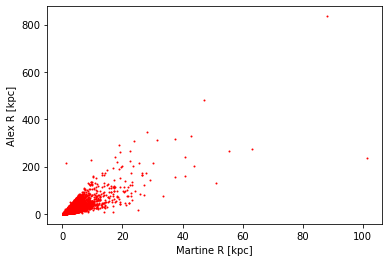

In [97]:
plt.plot(R_kpc, cat_sample['R_kpc'], 'ro', markersize=1)
plt.xlabel("Martine R [kpc]")
plt.ylabel("Alex R [kpc]")

Text(0, 0.5, 'R [kpc], Martine')

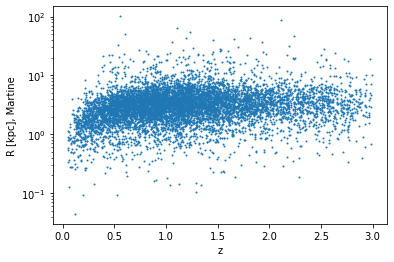

In [103]:
plt.scatter(cat_sample['PZflowredshift'], R_kpc, s=1)
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("R [kpc], Martine")

(-16.0, -24.0)

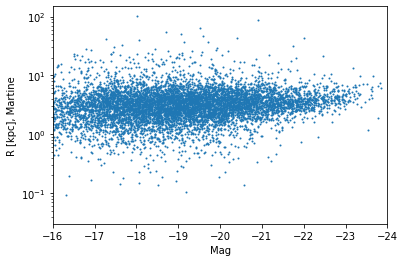

In [108]:
plt.scatter(cat_sample['Mag_true_r_sdss_z0'], R_kpc, s=1)
plt.yscale("log")
plt.xlabel("Mag")
plt.ylabel("R [kpc], Martine")
plt.xlim([-16,-24])

(0.1, 100)

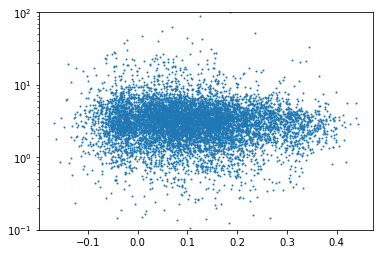

In [109]:
plt.scatter(cat_sample['Mag_true_r_sdss_z0']-cat_sample['Mag_true_i_sdss_z0'], R_kpc, s=1)
plt.yscale("log")
plt.ylim([.1,100])

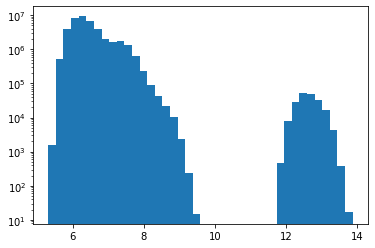

In [54]:
plt.hist(cat['Ixx_pixel']+cat['Iyy_pixel']-cat['RSQ_pixel_gal'], bins=40)
plt.yscale('log')
# plt.xlabel("IxxPSF+IyyPSF")
# plt.ylabel("counts")

(0.1, 100)

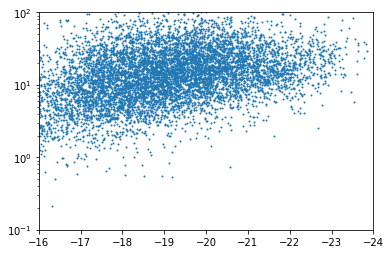

In [17]:
plt.scatter(cat_sample['Mag_true_r_sdss_z0'], cat_sample['R_kpc'], s=1)
plt.xlim([-16,-24])
plt.yscale("log")
plt.ylim([0.1,100])

(1, 100)

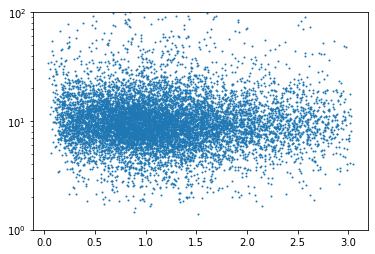

In [21]:
plt.scatter(cat_sample['DC2redshift'], (cat_sample['Ixx_pixel']+cat_sample['Iyy_pixel']), s=1)
plt.yscale("log")
plt.ylim([1,100])

(0.1, 100)

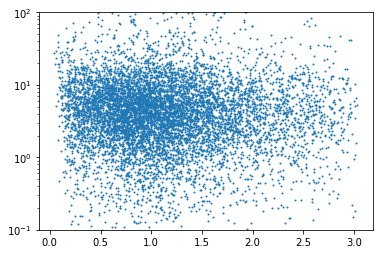

In [26]:
plt.scatter(cat_sample['DC2redshift'], cat_sample['RSQ_pixel_gal'], s=1)
plt.yscale("log")
plt.ylim([.1,100])

(0.1, 100)

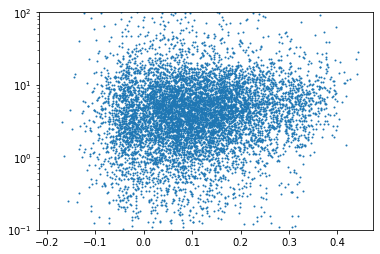

In [29]:
plt.scatter(cat_sample['Mag_true_r_sdss_z0']-cat_sample['Mag_true_i_sdss_z0'], cat_sample['RSQ_pixel_gal'], s=1)
plt.yscale("log")
plt.ylim([.1,100])

Text(0, 0.5, 'counts')

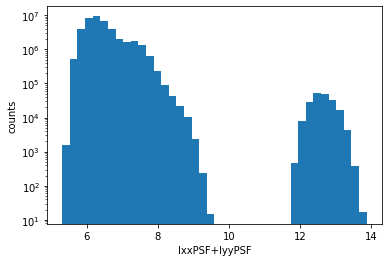

In [51]:
plt.hist((cat['IxxPSF_pixel']+cat['IyyPSF_pixel']), bins=40)
plt.yscale('log')
plt.xlabel("IxxPSF+IyyPSF")
plt.ylabel("counts")

Text(0, 0.5, 'R [kpc]')

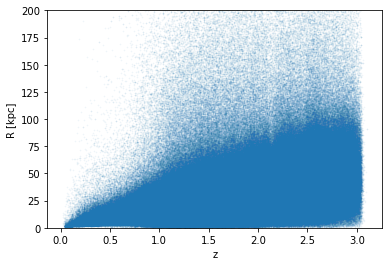

In [50]:
plt.scatter(cat_mag_sample['DC2redshift'], cat_mag_sample['R_kpc'], s=.5, alpha=.05)
plt.ylim([0,200])
plt.xlabel("z")
plt.ylabel("R [kpc]")
# plt.xlim([0,20])

In [56]:
ghost = pd.read_csv("/global/cscratch1/sd/mlokken/sn_hostenv/GHOSTwithImageSizes.csv")

In [57]:
g_Rkpc = (np.average([ghost['gR_kpc']**2, ghost['rR_kpc']**2, ghost['iR_kpc']**2, ghost['zR_kpc']**2, ghost['yR_kpc']**2], axis=0)) # radius in kpc, averaged across bands


In [72]:
ghost.columns

Index(['objID', 'raMean', 'decMean', 'NED_redshift', 'TransientRedshift',
       'gKronMag', 'gApMag', 'gPSFMag', 'rKronMag', 'rApMag', 'rPSFMag',
       'iKronMag', 'iApMag', 'iPSFMag', 'zKronMag', 'zApMag', 'zPSFMag',
       'yKronMag', 'yApMag', 'yPSFMag', 'gKronMagErr', 'gApMagErr',
       'gPSFMagErr', 'rKronMagErr', 'rApMagErr', 'rPSFMagErr', 'iKronMagErr',
       'iApMagErr', 'iPSFMagErr', 'zKronMagErr', 'zApMagErr', 'zPSFMagErr',
       'yKronMagErr', 'yApMagErr', 'yPSFMagErr', 'g-r', 'r-i', 'i-z', 'z-y',
       'g-rErr', 'r-iErr', 'i-zErr', 'z-yErr', 'g_ellip', 'r_ellip', 'i_ellip',
       'z_ellip', 'y_ellip', 'g_elong', 'r_elong', 'i_elong', 'z_elong',
       'y_elong', 'ghalfLightRad', 'rhalfLightRad', 'ihalfLightRad',
       'zhalfLightRad', 'yhalfLightRad', 'gKronMag_SDSS', 'rKronMag_SDSS',
       'iKronMag_SDSS', 'zKronMag_SDSS', 'yKronMag_SDSS', 'g-r_SDSS',
       'r-i_SDSS', 'i-z_SDSS', 'z-y_SDSS', 'TransientClass',
       'gKronMag_SDSS_rest', 'rKronMag_SDSS_rest', 'i

In [78]:
gslice = (ghost['rKronMag_SDSS_abs']<-20)&(ghost['rKronMag_SDSS_abs']>-20.5)

In [112]:
snia = ghost[ghost['TransientClass']=='SN Ia']

In [113]:
snii = ghost[ghost['TransientClass']=='SN II']

In [114]:
slsn = ghost[ghost['TransientClass']=='SLSN']

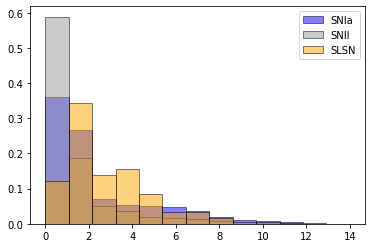

In [127]:
bins = np.linspace(0,14,14)
plt.hist(snia['rR_kpc'], density=True, color='blue', edgecolor='black', label='SNIa', alpha=.5, bins=bins)
plt.hist(snii['rR_kpc'], density=True, color='.6', edgecolor='black',label='SNII', alpha=.5, bins=bins)
plt.hist(slsn['rR_kpc'], density=True, color='orange', edgecolor='black',label='SLSN', alpha=.5, bins=bins)
plt.legend()

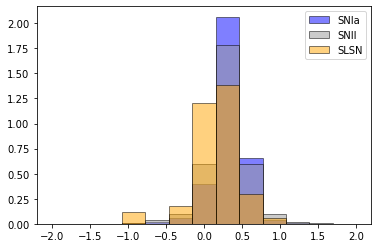

In [129]:
bins = np.linspace(-2,2,14)
plt.hist(snia['rKronMag_SDSS_abs']-snia['iKronMag_SDSS_abs'], density=True, color='blue', edgecolor='black', label='SNIa', alpha=.5, bins=bins)
plt.hist(snii['rKronMag_SDSS_abs']-snii['iKronMag_SDSS_abs'], density=True, color='.6', edgecolor='black',label='SNII', alpha=.5, bins=bins)
plt.hist(slsn['rKronMag_SDSS_abs']-slsn['iKronMag_SDSS_abs'], density=True, color='orange', edgecolor='black',label='SLSN', alpha=.5, bins=bins)
plt.legend()

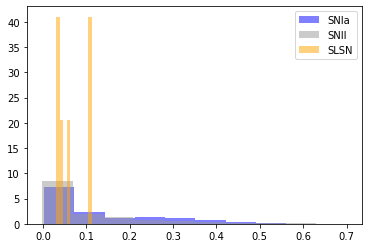

In [122]:
plt.hist(snia['NED_redshift'], density=True, color='blue', label='SNIa', alpha=.5)
plt.hist(snii['NED_redshift'], density=True, color='.6', label='SNII', alpha=.5)
plt.hist(slsn['NED_redshift'], density=True, color='orange', label='SLSN', alpha=.5)
plt.legend()

In [79]:
len(ghost[gslice])

1373

/tmp/ipykernel_2381/3159347455.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,100])


(0.003152770972055684, 100)

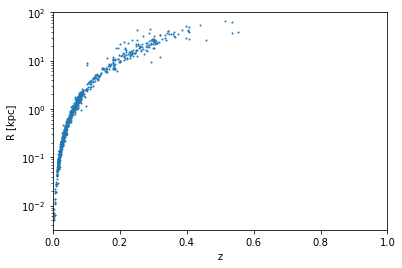

In [110]:
plt.scatter(ghost['NED_redshift'][gslice], g_Rkpc[gslice], s=1)
plt.ylabel("R [kpc]")
plt.xlabel("z")
plt.yscale("log")
plt.xlim([0,1])
plt.ylim([0,100])

In [11]:

len(img_moments['cosmoDC2_ID'])

135524878

In [14]:
cosmo=GCRCatalogs.load_catalog("cosmoDC2_v1.1.4_image")

In [17]:
c=0
for healpix in cosmo.available_healpix_pixels:
    # print(healpix)
    c+=1
print(c)

131


In [14]:
np.sum(np.isnan(img_moments['Ixx_pixel']))

In [4]:
img_moments.rename(columns={"cosmodc2_id_truth": "galaxy_id"}, inplace=True)

In [5]:
rsq = img_moments['Ixx_pixel']+img_moments['Iyy_pixel']

(array([4.2597324e+07, 8.7754802e+07, 3.1956140e+06, 8.8303200e+05,
        4.4045700e+05, 2.5011000e+05, 1.4294500e+05, 8.1672000e+04,
        5.0748000e+04]),
 array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 <BarContainer object of 9 artists>)

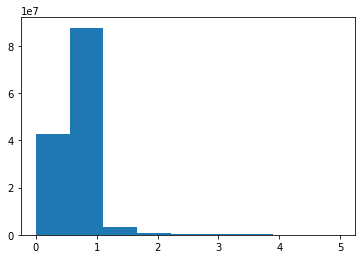

In [7]:
plt.hist(rsq, bins=np.linspace(0,5,10))

In [8]:
img_moments['RSQ_pixel'] = rsq

In [9]:
pzflow_cdc2 = pd.read_csv("/global/cscratch1/sd/mlokken/sn_hostenv/DC2full_pzRedshifts_SFR_39iter.csv")

In [10]:
# cut out galaxies below limiting magnitude
lim = pzflow_cdc2['mag_true_r_lsst']<28
pzflow_cdc2 = pzflow_cdc2.iloc[lim]

KeyError: 'mag_true_r_lsst'

In [ ]:
# now we only want objects with DC2 object information; do an inner join
combined = pd.merge(pzflow_cdc2, img_moments, on=['galaxy_id'], how='inner')


In [ ]:
z = combined['PZFlowredshift']

In [50]:
r = np.sqrt(combined['RSQ_pixel'])
pix_size = (0.2*u.arcsec) #arcsecond/pixel
r_units  = r*pix_size
Rkpc = (cosmo.kpc_proper_per_arcmin(z).to(u.kpc/u.arcsec))*rsq_units

In [ ]:
combined['R_kpc'] = Rkpc

(array([59044015., 60111618.,  9646821.,  2488338.,  1034360.,   586194.,
          388830.,   282407.,   217535.]),
 array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
         44.44444444,  55.55555556,  66.66666667,  77.77777778,
         88.88888889, 100.        ]),
 <BarContainer object of 9 artists>)

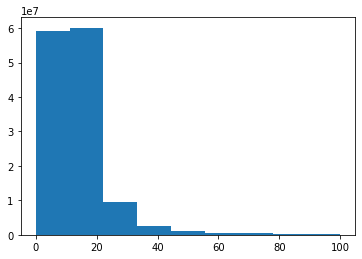

In [51]:
plt.hist(Rkpc, bins=np.linspace(0,100,10))

In [5]:
img_moments

,objectId,Ixx_pixel,Iyy_pixel,galaxy_id,Ixy_pixel
0,11975906419540343,12.971858,8.358371,10940305839,1.169572
1,11975906419541206,6.865114,6.564921,10937870093,0.117715
2,11976043858493441,2.295742,5.014928,11563663598,2.401884
3,11976043858493443,13.866013,7.680129,10938869183,2.193011
4,11976043858493737,2.735219,8.637352,11564005688,-1.096341
...,...,...,...,...,...
147088473,22316538400867140,13.344375,7.370457,1694944810,8.929000
147088474,22316538400867141,11.571315,10.547724,2312742610,0.724139
147088475,22316538400867142,18.562951,127.999873,2312742601,9.877786
147088476,22316538400867145,5.290018,1.280302,1691494770,1.024186


In [8]:
combined


,Mag_true_g_sdss_z0,Mag_true_r_sdss_z0,Mag_true_i_sdss_z0,Mag_true_z_sdss_z0,galaxy_id,morphology/totalEllipticity,g-r,r-i,i-z,DC2redshift,PZflowredshift,DC2SFRtot,PZflowSFRtot,stellar_mass,objectId,Ixx_pixel,Iyy_pixel,Ixy_pixel
0,-19.736664,-20.523220,-20.918970,-21.239140,9437500000,0.226894,0.786556,0.395750,0.320169,0.021649,0.109357,4.382349e+07,1.147855e+07,1.615380e+10,NaN,NaN,NaN,NaN
1,-16.519028,-17.164604,-17.443966,-17.614824,9437500001,0.279763,0.645576,0.279362,0.170858,0.021912,0.316597,7.054170e+04,1.876246e+04,1.450562e+08,NaN,NaN,NaN,NaN
2,-17.047089,-17.409150,-17.579525,-17.654705,9437500002,0.147890,0.362061,0.170376,0.075180,0.021491,0.075302,1.064076e+05,1.561233e+05,3.391156e+08,1.513863e+16,88.19983,56.254028,-4.682730
3,-17.090454,-17.500520,-17.711279,-17.808174,9437500003,0.406447,0.410067,0.210758,0.096895,0.021335,0.238126,2.170598e+05,4.165938e+05,2.541591e+08,NaN,NaN,NaN,NaN
4,-18.537634,-18.944980,-19.134615,-19.240267,9437500004,0.318275,0.407347,0.189634,0.105652,0.006085,0.213921,1.522319e+08,5.401607e+05,2.738792e+09,1.513876e+16,41.51354,34.767559,-9.703214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76075157,-18.074078,-18.148876,-18.184683,-18.198898,1314891622,0.005114,0.074799,0.035807,0.014215,0.986356,0.943870,2.462520e+05,8.769234e+07,5.762609e+07,NaN,NaN,NaN,NaN
76075158,-14.651442,-15.081634,-15.261306,-15.337568,1315000000,0.011960,0.430193,0.179671,0.076262,0.966721,0.980653,2.645950e+04,1.088002e+05,3.515392e+05,NaN,NaN,NaN,NaN
76075159,-15.789778,-15.779016,-15.780729,-15.774368,1315000000,0.003829,-0.010761,0.001713,-0.006361,0.969080,0.936746,2.821757e+07,1.100503e+07,1.555636e+06,NaN,NaN,NaN,NaN
76075160,-16.118214,-16.223175,-16.270870,-16.285759,1315000000,0.418838,0.104961,0.047695,0.014889,0.988141,0.950025,1.681506e+05,1.702327e+05,2.512723e+06,NaN,NaN,NaN,NaN


In [15]:
# combined['ellip_img'] = (combined['Ixx_pixel'] - combined['Iyy_pixel'] + 2*i*combined['Ixy_pixel']) / (combined['Ixx_pixel'] + combined['Iyy_pixel'])
# ellipticity is complex

In [16]:
combined

,Mag_true_g_sdss_z0,Mag_true_r_sdss_z0,Mag_true_i_sdss_z0,Mag_true_z_sdss_z0,galaxy_id,morphology/totalEllipticity,g-r,r-i,i-z,DC2redshift,PZflowredshift,DC2SFRtot,PZflowSFRtot,stellar_mass,objectId,Ixx_pixel,Iyy_pixel,Ixy_pixel,RSQ,ellip_img
0,-19.736664,-20.523220,-20.918970,-21.239140,9437500000,0.226894,0.786556,0.395750,0.320169,0.021649,0.109357,4.382349e+07,1.147855e+07,1.615380e+10,NaN,NaN,NaN,NaN,NaN,NaN
1,-16.519028,-17.164604,-17.443966,-17.614824,9437500001,0.279763,0.645576,0.279362,0.170858,0.021912,0.316597,7.054170e+04,1.876246e+04,1.450562e+08,NaN,NaN,NaN,NaN,NaN,NaN
2,-17.047089,-17.409150,-17.579525,-17.654705,9437500002,0.147890,0.362061,0.170376,0.075180,0.021491,0.075302,1.064076e+05,1.561233e+05,3.391156e+08,1.513863e+16,88.19983,56.254028,-4.682730,144.453858,0.156315
3,-17.090454,-17.500520,-17.711279,-17.808174,9437500003,0.406447,0.410067,0.210758,0.096895,0.021335,0.238126,2.170598e+05,4.165938e+05,2.541591e+08,NaN,NaN,NaN,NaN,NaN,NaN
4,-18.537634,-18.944980,-19.134615,-19.240267,9437500004,0.318275,0.407347,0.189634,0.105652,0.006085,0.213921,1.522319e+08,5.401607e+05,2.738792e+09,1.513876e+16,41.51354,34.767559,-9.703214,76.281099,-0.165971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76075157,-18.074078,-18.148876,-18.184683,-18.198898,1314891622,0.005114,0.074799,0.035807,0.014215,0.986356,0.943870,2.462520e+05,8.769234e+07,5.762609e+07,NaN,NaN,NaN,NaN,NaN,NaN
76075158,-14.651442,-15.081634,-15.261306,-15.337568,1315000000,0.011960,0.430193,0.179671,0.076262,0.966721,0.980653,2.645950e+04,1.088002e+05,3.515392e+05,NaN,NaN,NaN,NaN,NaN,NaN
76075159,-15.789778,-15.779016,-15.780729,-15.774368,1315000000,0.003829,-0.010761,0.001713,-0.006361,0.969080,0.936746,2.821757e+07,1.100503e+07,1.555636e+06,NaN,NaN,NaN,NaN,NaN,NaN
76075160,-16.118214,-16.223175,-16.270870,-16.285759,1315000000,0.418838,0.104961,0.047695,0.014889,0.988141,0.950025,1.681506e+05,1.702327e+05,2.512723e+06,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
np.sum(np.isnan(combined['objectId']))/len(combined)

0.5571361517442447

Cut out the nans

In [22]:
combined.to_csv("/global/cscratch1/sd/mlokken/sn_hostenv/DC2full_pzRedshifts_SFR_39iter_ImMom.tar.gz")

KeyboardInterrupt: 